<a href="https://colab.research.google.com/github/Martim35/WeatherPrevision-ML/blob/main/Weather_Prevision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

file = 'https://raw.githubusercontent.com/Martim35/WeatherPrevision-ML/main/WeatherLogs.csv'
weather = pd.read_csv(file, index_col="DATE")

weather

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,PSUN,SNOW,...,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01,WV03,WV20
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",80.0,100.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",30.0,20.0,NaN,NaN,NaN,0.00,79.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",70.0,100.0,NaN,NaN,NaN,0.02,0.0,0.0,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.0,0.0,NaN,NaN,NaN,0.00,100.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",40.0,60.0,NaN,NaN,NaN,0.00,79.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-29,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",NaN,NaN,5.82,NaN,NaN,0.47,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-30,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",NaN,NaN,5.59,NaN,NaN,0.01,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-31,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",NaN,NaN,5.59,NaN,NaN,0.00,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

,0
STATION,0.000000
NAME,0.000000
ACMH,0.519159
ACSH,0.519159
AWND,0.256495
FMTM,0.492577
PGTM,0.351189
PRCP,0.000050
PSUN,0.743555
SNOW,0.000100


In [5]:
valid_columns = weather.columns[null_pct < .05]
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [6]:
weather = weather[valid_columns].copy()
weather.columns = weather.columns.str.lower()
weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.00,0.0,0.0,34.0,24.0
1970-01-02,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.00,0.0,0.0,39.0,20.0
1970-01-03,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.02,0.0,0.0,36.0,25.0
1970-01-04,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.00,0.0,0.0,31.0,18.0
1970-01-05,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.00,0.0,0.0,43.0,16.0
...,...,...,...,...,...,...,...
2024-07-29,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.47,0.0,0.0,94.0,72.0
2024-07-30,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.01,0.0,0.0,86.0,73.0
2024-07-31,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.00,0.0,0.0,95.0,74.0


In [7]:
weather = weather.ffill()
weather.apply(pd.isnull).sum()

,0
station,0
name,0
prcp,0
snow,0
snwd,0
tmax,0
tmin,0


In [8]:
weather.dtypes

,0
station,object
name,object
prcp,float64
snow,float64
snwd,float64
tmax,float64
tmin,float64


In [9]:
weather.index = pd.to_datetime(weather.index)
weather.index.year.value_counts().sort_index()

,count
DATE,
1970,365
1971,365
1972,366
1973,365
1974,365
1975,365
1976,366
1977,365
1978,365


In [10]:
weather["target"] = weather.shift(-1)["tmax"]
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.00,0.0,0.0,34.0,24.0,39.0
1970-01-02,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.00,0.0,0.0,39.0,20.0,36.0
1970-01-03,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.02,0.0,0.0,36.0,25.0,31.0
1970-01-04,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.00,0.0,0.0,31.0,18.0,43.0
1970-01-05,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.00,0.0,0.0,43.0,16.0,40.0
...,...,...,...,...,...,...,...,...
2024-07-29,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.47,0.0,0.0,94.0,72.0,86.0
2024-07-30,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.01,0.0,0.0,86.0,73.0,95.0
2024-07-31,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.00,0.0,0.0,95.0,74.0,101.0


In [11]:
weather = weather.ffill()
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.00,0.0,0.0,34.0,24.0,39.0
1970-01-02,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.00,0.0,0.0,39.0,20.0,36.0
1970-01-03,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.02,0.0,0.0,36.0,25.0,31.0
1970-01-04,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.00,0.0,0.0,31.0,18.0,43.0
1970-01-05,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.00,0.0,0.0,43.0,16.0,40.0
...,...,...,...,...,...,...,...,...
2024-07-29,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.47,0.0,0.0,94.0,72.0,86.0
2024-07-30,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.01,0.0,0.0,86.0,73.0,95.0
2024-07-31,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.00,0.0,0.0,95.0,74.0,101.0


In [12]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]

        model.fit(train[predictors], train["target"])

        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [13]:
predictions = backtest(weather, rr, predictors)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

5.95405049417521

In [15]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
1998-12-22,26.0,59.041301,33.041301
1986-03-08,66.0,33.818044,32.181956
2022-02-23,41.0,71.506581,30.506581
1989-03-18,44.0,74.440869,30.440869
2007-03-15,39.0,69.125589,30.125589
...,...,...,...
1984-08-10,84.0,83.996784,0.003216
1986-03-04,48.0,48.002980,0.002980
1980-02-12,41.0,41.001795,0.001795


In [16]:
pd.Series(rr.coef_, index=predictors)

,0
prcp,-2.062493
snow,-0.158961
snwd,-0.023492
tmax,0.703273
tmin,0.236904


In [17]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather

rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)

In [18]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [19]:
weather = weather.iloc[14:,:]
weather = weather.fillna(0)

In [20]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [24]:
import numpy as np

predictions = backtest(weather.replace([np.inf, -np.inf], np.nan).fillna(0), rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

5.541653958509576

In [25]:
mean_squared_error(predictions["actual"], predictions["prediction"])

50.42781064465653

In [26]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
1987-02-28,72.0,42.306247,29.693753
2023-02-22,79.0,50.093368,28.906632
2022-12-23,20.0,48.749572,28.749572
1994-01-18,5.0,33.622355,28.622355
1992-04-16,84.0,55.871027,28.128973
...,...,...,...
1996-08-29,85.0,85.003026,0.003026
2008-05-09,65.0,65.001681,0.001681
1996-08-24,86.0,86.001289,0.001289


In [28]:
weather.loc["1987-02-25": "1987-03-01"]

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1987-02-25,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.00,0.0,3.0,46.0,26.0,44.0,45.000000,0.022222,...,24.857143,0.045977,0.132143,-1.000000,44.190099,51.611111,26.510891,32.555556,0.114277,0.093333
1987-02-26,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.00,0.0,2.0,44.0,23.0,37.0,44.666667,-0.014925,...,24.500000,-0.061224,0.128571,-1.000000,44.189723,45.833333,26.503953,30.666667,0.114051,0.058333
1987-02-27,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.00,0.0,1.0,37.0,31.0,40.0,42.333333,-0.125984,...,24.357143,0.272727,0.128571,-1.000000,44.175542,48.277778,26.512821,30.055556,0.113826,0.023889
1987-02-28,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.36,0.0,1.0,40.0,29.0,72.0,40.333333,-0.008264,...,24.642857,0.176812,0.154286,1.333333,44.167323,50.277778,26.517717,28.666667,0.114311,0.058333
1987-03-01,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.33,0.0,0.0,72.0,40.0,54.0,49.666667,0.449664,...,26.214286,0.525886,0.177857,0.855422,53.863636,51.944444,34.420455,29.111111,0.112557,0.060000


<Axes: xlabel='diff'>

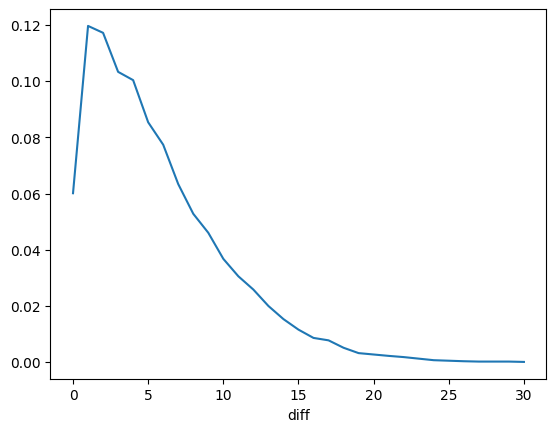

In [29]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()

In [30]:
predictions

,actual,prediction,diff
DATE,,,
1980-01-13,47.0,37.375988,9.624012
1980-01-14,52.0,45.275197,6.724803
1980-01-15,54.0,48.944950,5.055050
1980-01-16,42.0,48.524330,6.524330
1980-01-17,43.0,41.686598,1.313402
...,...,...,...
2024-07-29,86.0,90.379731,4.379731
2024-07-30,95.0,87.612930,7.387070
2024-07-31,101.0,92.773840,8.226160
